# Statistical Analysis II - Practicum 3

In [3]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load the personality assessment test (bfi dataset). Are there any latent variables that can explain the personality groups on the basis of a factor analysis?

In [4]:
df= pd.read_csv("./Datasets/bfi.csv",index_col=0)

In [5]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


What variables are not part of the assessment? Can you drop them along with rows containing NaNs?

In [6]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


How much are input variables correlated?

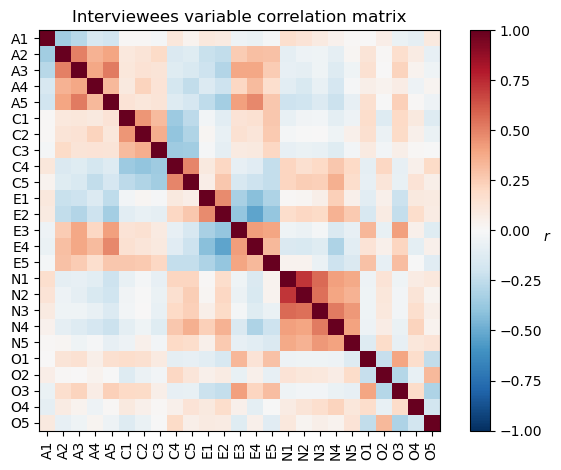

In [7]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(df.T), cmap="RdBu_r", vmin=-1, vmax=1)

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)

ax.set_xticks([r for r in range(len(df.columns))])
ax.set_xticklabels(list(df.columns), rotation=90)
ax.set_yticks([r for r in range(len(df.columns))])
ax.set_yticklabels(list(df.columns))

ax.set_title("Interviewees variable correlation matrix")
plt.tight_layout()

How many factors are we going to need as latent variables?

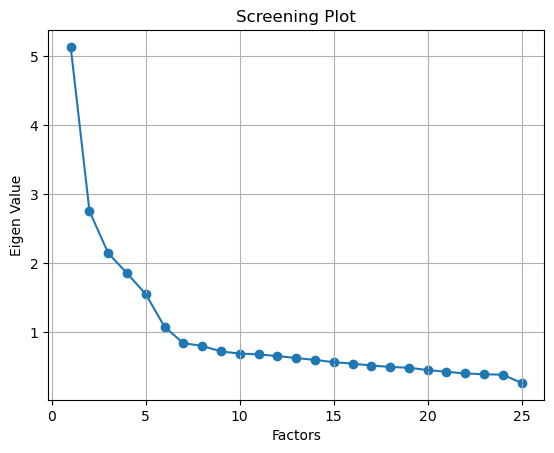

In [8]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])

fa.fit(df)

ev,_ = fa.get_eigenvalues()

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Screening Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value') #Eigen values are the number of features each factor accounts for.
plt.grid()

What are the factor loadings?

In [9]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax') #varimax: few large and lots of close to 0 factor loadings

fa.fit(df)

print(pd.DataFrame(fa.loadings_,index=df.columns))

           0         1         2         3         4         5
A1  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
A2  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
A3 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
A4 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356
A5 -0.149616  0.414458  0.106382  0.469698  0.030977  0.236519
C1 -0.004358  0.077248  0.554582  0.007511  0.190124  0.095035
C2  0.068330  0.038370  0.674545  0.057055  0.087593  0.152775
C3 -0.039994  0.031867  0.551164  0.101282 -0.011338  0.008996
C4  0.216283 -0.066241 -0.638475 -0.102617 -0.143846  0.318359
C5  0.284187 -0.180812 -0.544838 -0.059955  0.025837  0.132423
E1  0.022280 -0.590451  0.053915 -0.130851 -0.071205  0.156583
E2  0.233624 -0.684578 -0.088497 -0.116716 -0.045561  0.115065
E3 -0.000895  0.556774  0.103390  0.179396  0.241180  0.267291
E4 -0.136788  0.658395  0.113798  0.241143 -0.107808  0.158513
E5  0.034490  0.507535  0.309813  0.078804  0.200821  0

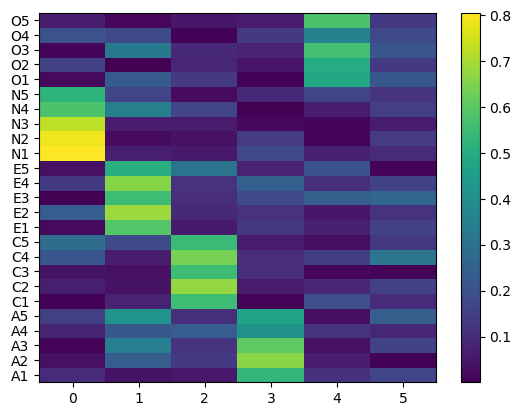

In [10]:
Z=np.abs(fa.loadings_)

fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks([r+0.5 for r in range(len(df.columns))])
ax.set_yticklabels(list(df.columns))
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_xticklabels(np.arange(fa.loadings_.shape[1]), minor=False)
plt.show()

What is the amount of variance explained by the factors?

In [11]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          2.726989  2.602239  2.073471  1.713499  1.504831  0.630297
Proportional Var  0.109080  0.104090  0.082939  0.068540  0.060193  0.025212
Cumulative Var    0.109080  0.213169  0.296108  0.364648  0.424841  0.450053


What are the communalities (i.e. the proportion of variance that can be explained for each input variable) of the factors?

In [12]:
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

    Communalities
A1       0.333825
A2       0.515664
A3       0.526418
A4       0.297074
A5       0.482995
C1       0.358783
C2       0.495421
C3       0.316865
C4       0.591392
C5       0.432101
E1       0.398746
E2       0.559997
E3       0.482483
E4       0.560044
E5       0.401381
N1       0.702038
N2       0.665280
N3       0.537931
N4       0.505558
N5       0.349153
O1       0.346671
O2       0.298544
O3       0.486002
O4       0.246123
O5       0.360839
